# **AP155 Lab Assignment**
## Module 6: Random Process and Monte Carlo Methods

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: Bendejo, Kevin D.\
_Student No._:2022-08528\
_Section_: TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: KEVIN BENDEJO**

### Grading Information (c/o Lab Instructor)

> Add blockquote



TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1

**The Ising model**

_Refer to Exercise 10.9 in the Newman text._ The Ising model is a theoretical model of a magnet. The magnetic potential energy due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $s_i s_j$ for spins on sites $i$ and $j$ of the lattice, since the spins are one-dimensional scalars, not vectors. Then the actual energy of interaction is $-Js_i s_j$, where $J$ is a positive interaction constant. The minus sign ensures that the in- teractions are ferromagnetic, meaning the energy is lower when dipoles are lined up. A ferromagnetic interaction implies that the material will magnetize if given the chance.

Normally it is assumed that spins interact only with those that are immediately adjacent to them on the lattice, which gives a total energy for the entire system equal to
$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$
where the notation $\langle ij \rangle$ indicates a sum over pairs $i,j$ that are adjacent on the lattice. On the square lattice we use in this exercise each spin has four adjacent neighbors with which it interacts, except for the spins at the edges of the lattice, which have either two or three neighbors.

Perform a Markov chain Monte Carlo simulation of the Ising model on the square lattice for a system of 20 x 20 spins. You will need to set up variables to hold the value ±1 of the spin on each lattice site, probably using a two-dimensional integer array, and then take the following steps.


$$ E = -J \sum_{\langle ij \rangle} s_i s_j,$$

1. Write a function to calculate the total energy of the system, as given by the equation above. That is, for a given array of values of the spins, go through every pair of adjacent spins and add up the contributions $s_i s_j$ from all of them, then multiply by $-J$. Hint 1: Each unique pair of adjacent spins crops up only once in the sum. Thus there is a term $-Js_1s_2$ if spins 1 and 2 are adjacent to one another, but you do not also need a term $-Js_2s_1$. Hint 2: To make your final program to run in a reasonable amount of time, you will find it helpful if you can work out a way to calculate the energy using Python's ability to do arithmetic with entire arrays at once. If you do the calculation step by step, your program will be significantly slower. *(25 pts.)*


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Function that calculates the total energy of the system

def energy(s, J, N):
  # Initial Matrices
  d = np.zeros([N,N], float) # Matrix for the contributions of the spins and their neighboor below
  r = np.zeros([N,N], float) # Matrix for the contributions of the spins and their right neighboor

  # Calculates the contributions with the down neighbor via array slices
  for i in range (N):
    if i != N-1:
      d[i,:] = s[i,:]*s[i+1,:] # Multiplies the ith row to the one below it

    else: # Boundary condition
      d[N-1,:] = 0 # Set to zero sincce it was already accounted for

  # Calculates the contributions with the right neighbor via array slices
  for j in range (N):
    if j != N-1:
      r[:,j] = s[:,j]*s[:,j+1] # Multiplies the jth column to the one immediately to the right

    else: # Boundary condition
      r[:,N-1] = 0 # Set to zero sincce it was already accounted for

  p = np.sum(d) + np.sum(r) #sums all the element of d and r
  return -J*p #outputs the contributions of the spins and multiplies it to j



2. Now use your function as the basis for a Metropolis-style simulation of the Ising model with $J = 1$ and temperature $T = 1$ in units where the Boltzmann constant $k_B$ is also 1. Initially set the spin variables randomly to ±1, so that on average about a half of them are up and a half down, giving a total magneti- zation of roughly zero. Then choose a spin at random, flip it, and calculate the new energy after it is flipped, and hence also the change in energy as a result of the flip. Then decide whether to accept the flip using the Metropolis acceptance formula, Eq. (10.60). If the move is rejected you will have to flip the spin back to where it was. Otherwise you keep the flipped spip. Now repeat this process for many moves. *(25 pts.)*



3. Make a plot of the total magnetization $M = \sum_i s_i$ of the system as a function of time for a million Monte Carlo steps. You should see that the system develops a "spontaneous magnetization," a nonzero value of the overall magnetization. Hint: While you are working on your program, do shorter runs, of maybe ten thousand steps at a time. Once you have it working properly, do a longer run of a million steps to get the final results. *(25 pts.)*


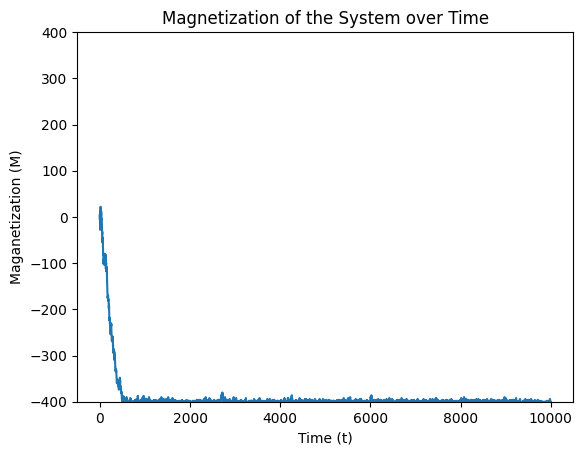

Final Magnetization : -400.0


In [57]:

# Parameters/Constants
J = 1
T = 1
k_b = 1
steps = 1_000_000
#Initial 20x20 Square matrix
N = 20

# Creating the matrix s where there are equal 1s and -1s randomly placed as its elements

rng = np.random.default_rng(seed=6) #sets the random number generator as the default rng in numpy random
ones = np.ones(N*N//2, float) #1d array of ones with the size = half of the elements of the s matrix
s = np.concatenate([ones] + [-1*ones]) #Assigns s as the combination of 1 and -1 with equal amounts
rng.shuffle(s) #shuffles the elements of s to a random permutation
s = s.reshape(N,N) #reshapes the formerly 1D array to a 20x20 matrix

mplot = [] # Initializes the list of Magnetization for each step
M = np.sum(s) # Calculates the initial Magnetization
E = energy(s,J,N) # Calculates the initial energy

# Picking a spin at random
for k in range (steps): #done for several times
  #choose a spin and flip
  a,b = rng.integers(0,N, size=2) # Assigns a and b as the 2 random integer from zero to N-1
  s[a,b] = -1*s[a,b] #flips the spin of the of the randomly selected spin

  # Calculating the new energy and change in energy
  E_new = energy (s,J,N) # energy of the new state
  delta_E = E_new - E # Change in energy

  # Deciding whether to accept or no using metropolis acceptance formula (Eq 10.60)
  if rng.random() < np.exp(-(delta_E)/(k_b*T)):
    "rng.random() spits out a random number from 0 to 1"
    "if delta_E is negative or zero(ie. energy decreased or stayed the same), automatic accept since rhs will be greater than or equal to 1 "
    "if delta_E is positive, probability of acceptance is based on exp(-delta/k_b*T)"

    E = E_new #sets the energy of the new state as the current energy
    M = np.sum(s) #calculates the new magnetization

  else:
    s[a,b] = -1*s[a,b] #if rejected revert the spin back

#Adds the current magnetization every 100 steps to mplot
  if k % 100 == 0:
    mplot.append(M)


#plots the total magnetization M as a function of time for a million Monte Carlo Steps

plt.plot (np.arange(0,steps//100,1),mplot)
plt.title ('Magnetization of the System over Time')
plt.xlabel("Time (t)")
plt.ylabel("Maganetization (M)")
plt.ylim(-400,400)
plt.show()

print ("Final Magnetization : " + str(mplot[-1]))



4. Run your program several times and observe the sign of the magnetization that develops, positive or negative. Describe what you find and give a brief explana- tion of what is happening. *(25 pts.)*

In [54]:
def Mult_ising_sim(size, steps, iter, J, T, k_b):
  Mplot = []
  for a in range (iter):
    #Initial 20x20 Square matrix
    N = size

    # Creating the matrix s where there are equal 1s and -1s randomly placed as its elements

    rng = np.random.default_rng(seed=a) #sets the random number generator as the default rng in numpy random
    ones = np.ones(N*N//2, float) #1d array of ones with the size = half of the elements of the s matrix
    s = np.concatenate([ones] + [-1*ones]) #Assigns s as the combination of 1 and -1 with equal amounts
    rng.shuffle(s) #shuffles the elements of s to a random permutation
    s = s.reshape(N,N) #reshapes the formerly 1D array to a 20x20 matrix

    mplot = [] # Initializes the list of Magnetization for each step

    M = np.sum(s) # Calculates the initial Magnetization
    E = energy(s,J,N) # Calculates the initial energy

    # Picking a spin at random
    for k in range (steps): #done for several times
      #choose a spin and flip
      a,b = rng.integers(0,N, size=2) # Assigns a and b as the 2 random integer from zero to N-1
      s[a,b] = -1*s[a,b] #flips the spin of the of the randomly selected spin

      # Calculating the new energy and change in energy
      E_new = energy (s,J,N) # energy of the new state
      delta_E = E_new - E # Change in energy

      # Deciding whether to accept or no using metropolis acceptance formula (Eq 10.60)
      if rng.random() < np.exp(-(delta_E)/(k_b*T)):
        "rng.random() spits out a random number from 0 to 1"
        "if delta_E is negative or zero(ie. energy decreased or stayed the same), automatic accept since rhs will be greater than or equal to 1 "
        "if delta_E is positive, probability of acceptance is based on exp(-delta/k_b*T)"

        E = E_new #sets the energy of the new state as the current energy
        M = np.sum(s) #calculates the new magnetization

      else:
        s[a,b] = -1*s[a,b] #if rejected revert the spin back

    #Adds the current magnetization every 100 steps to mplot
      if k % 100 == 0:
        mplot.append(M)

    Mplot.append(mplot)
    #plots the total magnetization M as a function of time for a million Monte Carlo Steps
  print (len(Mplot))

  plt.plot(np.arange(0,steps//100,1),Mplot[0], label ='Trial 1')
  plt.plot(np.arange(0,steps//100,1),Mplot[1], label ='Trial 2')
  plt.plot(np.arange(0,steps//100,1),Mplot[2], label ='Trial 3')
  plt.plot(np.arange(0,steps//100,1),Mplot[3], label ='Trial 4')

  plt.title ('Magnetization of the System over Time')
  plt.xlabel("Time (t)")
  plt.ylabel("Maganetization (M)")
  plt.ylim(-400,400)
  plt.legend()
  plt.show()


4


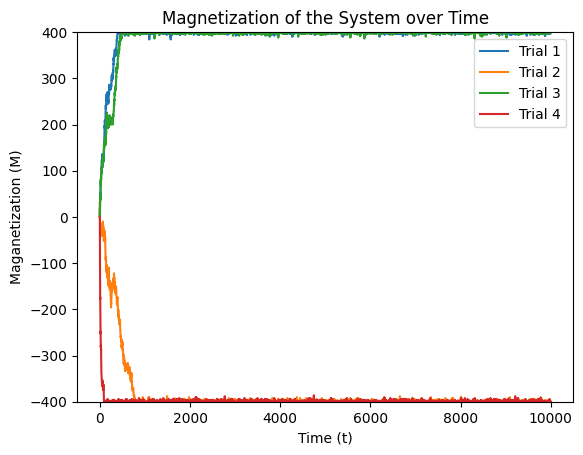

In [56]:
Mult_ising_sim(20, 1_000_000, 4, 1, 1, 1)

Looking at multiple trials of the algoritthm, we can see that the magnetization after 1 million monte carlo steps ends up to be either 400 or -400. This means that the elements in the system, after modifying one spin at a time, will eventually have the same spins. From the simulation, it can be inferred that it is more energy-efficent for the system to have its elements have the same spin.